## Visualisasi Decision Tree dengan Matplotlib

Berikut adalah deskripsi langkah demi langkah untuk visualisasi Decision Tree menggunakan Matplotlib dalam konteks analisis data dengan Python.

# Import Libraries
Pertama-tama, kita perlu mengimpor pustaka yang diperlukan untuk proses ini:

- `pandas`: Untuk manipulasi dan analisis data.
- `matplotlib` : untuk memvisualisasikan pohon keputusan (decision tree)
- `sklearn.model_selection`: Untuk membagi data menjadi set pelatihan dan pengujian, serta melakukan validasi silang.
- `sklearn.tree`: Untuk membuat model klasifikasi Decision Tree.
- `sklearn.metrics`: Untuk mengukur akurasi dan laporan klasifikasi model.
- `sklearn.preprocessing`: Untuk melakukan encoding label pada target.


In [19]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset
Kita akan memuat dataset dari file CSV menggunakan `pandas`:

In [20]:
# read a dataset 
df = pd.read_csv('breast-cancer.csv')

In [21]:
# example method: show the first 5 rows 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# cek missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [23]:
# jika ada data missing values, hapus baris tersebut 
df.dropna(inplace=True)

# Preprocessing Data
Sebelum melatih model, kita perlu melakukan beberapa pra-pemrosesan pada data:

- Menggunakan `LabelEncoder` untuk mengubah label target menjadi nilai numerik.
- Memisahkan fitur (X) dan target (y) dari dataset.
- Membagi dataset menjadi set pelatihan dan pengujian

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels dengan nilai antara 0 dan n_classes-1
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Persiapan Data untuk Model Klasifikasi

Sebelum melatih model klasifikasi, kita perlu mempersiapkan data yang akan digunakan. Ini melibatkan pemisahan data menjadi fitur (X) yang akan digunakan sebagai input untuk model, dan target (y) yang merupakan variabel yang ingin kita prediksi.

Dalam contoh kode Python berikut, kita mempersiapkan data dari DataFrame pandas dengan memisahkan fitur dan target.


In [25]:
# Fitur (X) adalah semua kolom kecuali 'id' dan 'diagnosis'
X = df.drop(['id', 'diagnosis'], axis=1)

# Target (Y) adalah kolom 'diagnosis'
y = df['diagnosis']

Setelah menjalankan kode ini, kita akan memiliki dua set data: X yang berisi fitur-fitur untuk pelatihan, dan y yang berisi label yang sesuai. Kita dapat menggunakan X dan y ini untuk melatih model klasifikasi dan kemudian membuat prediksi.

Contoh melanjutkan proses dengan pembagian data menjadi set pelatihan dan pengujian:

In [26]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dalam contoh di atas, kita menggunakan train_test_split dari modul `sklearn.model_selection` untuk membagi data menjadi set pelatihan dan pengujian. Parameter `test_size`=0.2 menunjukkan bahwa 20% dari data akan digunakan sebagai set pengujian, sementara sisanya akan digunakan untuk pelatihan model. `random_state` digunakan untuk memastikan bahwa pembagian data konsisten jika kode dijalankan berulang kali.



## Pemodelan dengan Decision Tree
Decision Tree Classifier adalah salah satu algoritma pembelajaran mesin yang populer dan mudah dipahami. Algoritma ini bekerja dengan membuat model prediksi berdasarkan aturan keputusan yang diambil dari fitur data. Decision Tree sangat berguna dalam tugas klasifikasi dan regresi.

Dalam contoh kode berikut, kita akan menggunakan `DecisionTreeClassifier` dari library `Scikit-Learn` untuk membuat dan melatih model Decision Tree:


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Setelah model dilatih, kita dapat menggunakan model ini untuk membuat prediksi pada data baru atau mengevaluasi kinerjanya pada data pengujian. Decision Tree Classifier sering dipilih karena kemudahannya dalam interpretasi dan visualisasi, serta kemampuannya untuk menangani data yang tidak linier.

# Membuat Prediksi dengan Model Klasifikasi

Setelah melatih model klasifikasi dalam machine learning, langkah selanjutnya adalah menggunakan model tersebut untuk membuat prediksi pada data yang belum pernah dilihat sebelumnya, sering kali disebut sebagai set data pengujian (test set). Ini membantu kita untuk memahami bagaimana model akan berperilaku dalam skenario dunia nyata.

Dalam contoh kode Python berikut, kita menggunakan metode `predict` dari model klasifikasi yang telah kita latih untuk membuat prediksi pada set data pengujian.

In [28]:
# Membuat prediksi pada test set
y_pred = clf.predict(X_test)

# Evaluasi Model dengan Metrik Akurasi dan Laporan Klasifikasi

Setelah melatih model klasifikasi dalam machine learning, penting untuk mengevaluasi kinerjanya pada set data pengujian. Scikit-learn menyediakan berbagai metrik untuk evaluasi model, termasuk akurasi dan laporan klasifikasi yang komprehensif.

Dalam contoh kode Python berikut, kita menggunakan `accuracy_score` dan `classification_report` dari modul `sklearn.metrics` untuk mengevaluasi model yang telah kita latih.


In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Cross Validation
Cross-validation adalah teknik statistik yang digunakan untuk mengevaluasi kinerja model machine learning dengan membagi data menjadi beberapa bagian. Teknik ini memungkinkan kita untuk memperkirakan seberapa baik model akan bekerja pada data yang tidak terlihat sebelumnya, yang membantu dalam mencegah masalah seperti overfitting.

Dalam contoh kode Python berikut, kita menggunakan `cross_val_score` dari modul `sklearn.model_selection` untuk melakukan cross-validation pada model yang telah kita tentukan sebelumnya.


In [30]:
from sklearn.model_selection import cross_val_score

# Melakukan cross-validation
scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
Average cross-validation score: 0.9173420276354604


Cross validation atau validasi silang adalah langkah penting dalam proses evaluasi model karena membantu dalam menilai bagaimana hasilnya akan digeneralisasi ke dataset independen dan dalam mencegah overfitting.

# Visualisasi Decision Tree

Program ini menggunakan library `Scikit-Learn` untuk memvisualisasikan pohon keputusan (decision tree) yang telah dilatih. Visualisasi ini membantu dalam memahami bagaimana model membuat keputusan berdasarkan fitur yang diberikan dan bagaimana struktur pohon dibangun.

Kita akan mengimport fungsi `plot_tree` dari modul `tree`:

- `plot_tree`: Fungsi ini digunakan untuk menghasilkan representasi grafis dari pohon keputusan. Visualisasi ini dapat menunjukkan bagaimana pohon membagi data, kriteria pemisahan di setiap node, dan distribusi kelas di daun pohon.

Berikut adalah contoh penggunaan `plot_tree` untuk memvisualisasikan pohon keputusan:

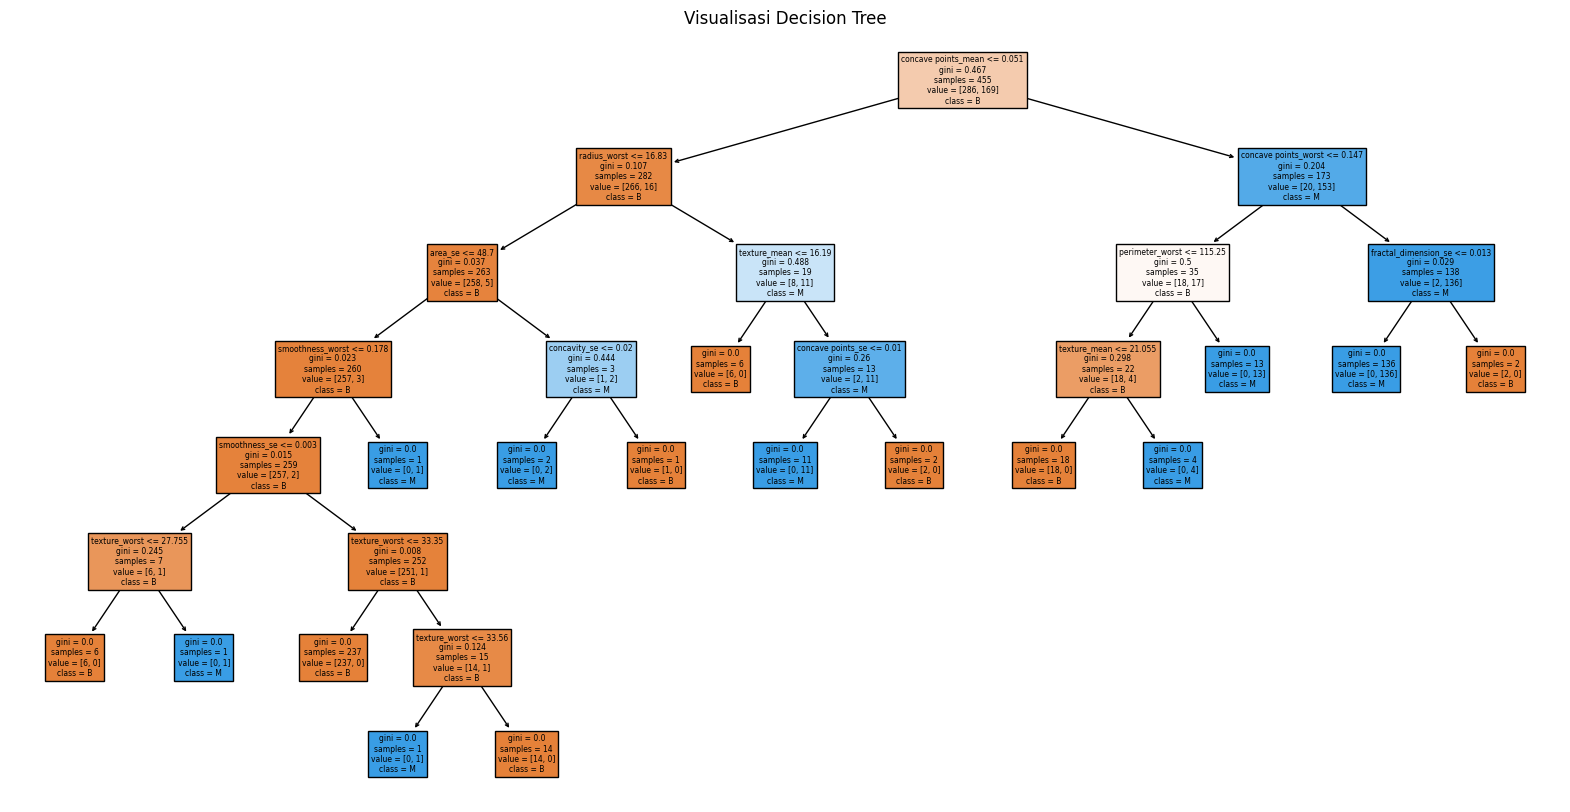

In [31]:
from sklearn.tree import plot_tree

# Visualisasi Decision Tree
plt.figure(figsize=(20,10))  # Set ukuran figure
plot_tree(clf, 
          filled=True,      # Warna node untuk menunjukkan mayoritas kelas
          class_names=le.classes_,  # Nama kelas untuk label node
          feature_names=X.columns)  # Nama fitur untuk label node
plt.title("Visualisasi Decision Tree")
plt.show()

Setelah menjalankan kode ini, kita akan melihat visualisasi pohon keputusan yang menunjukkan bagaimana model membagi data berdasarkan fitur yang berbeda dan membuat keputusan klasifikasi.